In [ ]:
#| hide
import geopandas as gpd
from pyLandUseMX.descargas import *
from pyLandUseMX.coberturas import *
from pyLandUseMX.denue import *

# pyLandUseMX

> Herramientas para construir y obtener variables de uso de suelo y estructura urbana en México

El uso de suelo es un insumo básico para diferentes investigaciones en el contexto urbano: criminología, movilidad y diseño urbano, por ejemplo, son campos en los que contar con información sobre el uso real del suelo resulta fundamental para realizar investigaciones cuantitativas. Esta librería busca ofrecer diferentes opciones para construir variables e índices para caracterizar el uso de suelo _real_, es decir el uso observado, en el contexto de las ciudades mexicanas. 

Además de mediciones sobre uso de suelo, la librería provee métodos para extraer variables de estructura urbana como mezcla e intensidad de uso de suelo. También implementa algunas herramientas básicas de análisis para extraer patrones y relaciones en diferentes escalas.

La librería aprovecha diferentes fuentes de datos públicas como el DENUE y el Censo para estimar variables de uso de suelo y su cambio en el tiempo. Provee métodos para definir tipos de uso de suelo y agregarlo en diferentes unidades espaciales: mallas regulares, hexágonos y polígonos arbitrarios (como colonias o AGEBS).

## Instalación

Por lo pronto, la manera más fácil de instalar la librería es usando `pip` para instalar desde el repositorio. Antes es necesario asegurarse de que las dependencias del sistema están instaladas:

* `gdal`
* `rtree`
* `libgeos`
* `proj`

En sistemas basados en `apt`:

```sh
sudo apt-get install -y gdal-bin python3-gdal python3-rtree libspatialindex-dev libgeos-dev libproj-dev
```

Ya con las dependencias instaladas:

```sh
pip install git+https://github.com/CentroGeo/pyLandUseMX
```


## Uso

La librería contiene una serie de módulos para realizar diferentes tareas para la extracción y proceso de variables de uso de suelo. 

La organización general de los módulos es:

* descargas: herramientas para bajar bases preprocesadas sobre el medio urbano
* coberturas: herramientas para la integración de datos en doferentes soportes geográficos
* análisis: métodos analíticos

## Descargas

El módulo de `descargas`, provee funciones para edscargar de nuestros repositorios algunas capas que contienen variables relevantes para la extracción y análisis de uso de suelo en México. Cada función descarga los datos en la carpeta `datos/descargas` del directorio de instalación. Cada función regresa el _path_ al archivo descargado.

#### Red de transporte

Por lo pronto tenemos disponible para descarga la red de transporte obtenida de [OpenStreetMap](https://www.openstreetmap.org/) para la región central del país (la Zona Metropolitana del Valle de México). Para descargar estos datos simplemente llamamos a la función correspondiente:

El archivo ya está descargado


<AxesSubplot:>

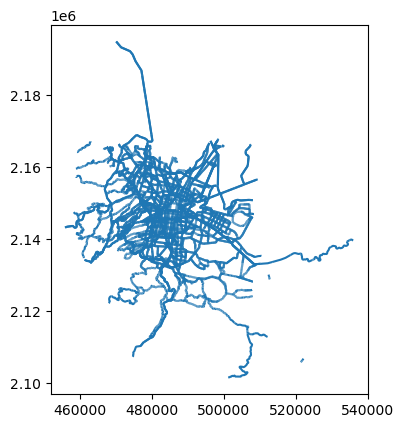

In [ ]:
pth_redes = descarga_redes() # descarga la red
red = gpd.read_file(pth_redes) # leemos con geopandas
red = red.loc[red.tag_id.isin([104,108,106,101])] # seleccionamos vialidades primarias
red.plot()

#### Polígonos del Sistema Urbano Nacional
También tenemos disponibles para descarga los polígonos de las ciudades del [Sistema Urbano Nacional](https://www.gob.mx/conapo/acciones-y-programas/sistema-urbano-nacional-y-zonas-metropolitanas) (SUN) del 2018.  Estos representan los límites de las principales aglomeraciones urbanas del país. 

````Python
pth_sun = descarga_poligonos_ciudades()
````

##### Colonias CDMX
Tenemos una base de colonias para la CDMX basadas en la que se publica en [Datos Abiertos CDMX](https://datos.cdmx.gob.mx/) con algunas correcciones topológicas.

````Python
pth_colonias = descarga_colonias_cdmx()
````

#### DENUE

Por lo pronto tenemos una base del DENUE integrada para el año 2022 en la Ciudad de México. Eventualmete estaremos publicando una actualización con datos históricos, desde el 2015, para las principales ciudades del país.
````Python
pth_denue = descarga_denue()
````

## Coberturas

Regularmente para trabajos sobre análisis de uso de suelo y cobertura urbana se parte de la integración de la información en algún soporte espacial. El módulo `coberturas` provee métodos para estructurar las fuentes de datos en dos grandes tipos de soporte:

* Mallas regulares
* Polígonos arbitrarios

Supongamos que tenemos una capa de puntos que representa la ocurrencia de algún uso de suelo y las vialidades primarias. Podemos fácilmente agregar las dos capas en una malla regular, obtener rasters y visualizarlos

In [ ]:
puntos = gpd.read_file("../datos/points_sample.zip") # Leemos los puntos
puntos = puntos.to_crs(32614)
malla = Malla.desde_capa(puntos, 1000) # Creamos una malla del tamaño de los puntos
malla = (malla
             .agrega_puntos(puntos, campo="puntos")
             .agrega_lineas(red, campo='metros_vialidad')
             )
malla.datos

,grid_id,puntos,geometry,metros_vialidad
0,0,0.0,"POLYGON ((404331.782 2029252.065, 405331.782 2...",0.0
1,1,0.0,"POLYGON ((404331.782 2030252.065, 405331.782 2...",0.0
2,2,0.0,"POLYGON ((404331.782 2031252.065, 405331.782 2...",0.0
3,3,0.0,"POLYGON ((404331.782 2032252.065, 405331.782 2...",0.0
4,4,0.0,"POLYGON ((404331.782 2033252.065, 405331.782 2...",0.0
...,...,...,...,...
50499,50499,0.0,"POLYGON ((639331.782 2238252.065, 640331.782 2...",0.0
50500,50500,1.0,"POLYGON ((639331.782 2239252.065, 640331.782 2...",0.0
50501,50501,0.0,"POLYGON ((639331.782 2240252.065, 640331.782 2...",0.0
50502,50502,0.0,"POLYGON ((639331.782 2241252.065, 640331.782 2...",0.0


Podemos ver los rasters

<matplotlib.collections.QuadMesh>

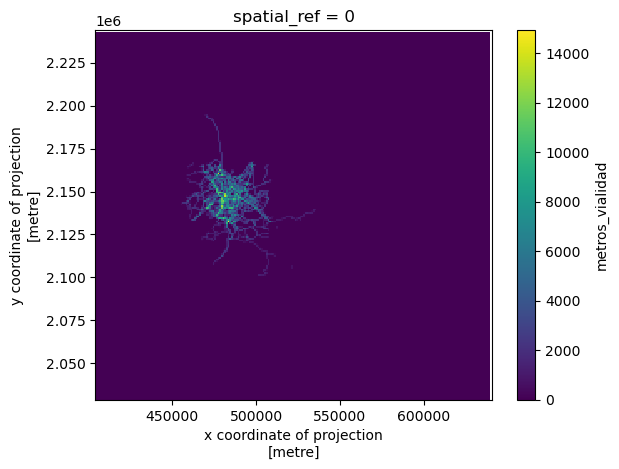

In [ ]:
cube = malla.to_xarray()
cube.metros_vialidad.plot()

<matplotlib.collections.QuadMesh>

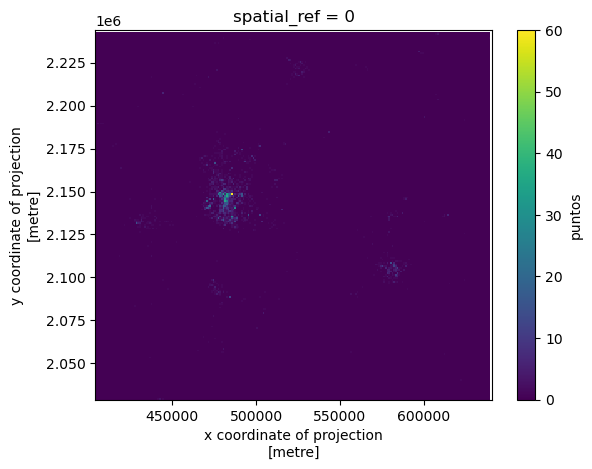

In [ ]:
cube = malla.to_xarray()
cube.puntos.plot()

## DENUE

Este módulo provee funcionalidades para trabajar con datos del Directorio Nacional de Unidades Económicas y obtener algunas variables de uso de suelo.

Permite seleccionar actividades económicas por clave SCIAN o agregar estas actividades en categorías usando expresiones regulares.

Por ejemplo, supongamos que queremos tomar los puntos del DENUE y generar una clasificación en tres grupos de usus de suelo: manufacturas, oficinas y comercio. Entonces, a partir de una selección sobre las claves SCIAN podemos hacer:

In [ ]:
pth = descarga_denue('ejemplo')
denue = Denue.desde_archivo(pth)
categorias = {
    'Manufacturas': ['^31.*5$', '^32.*5$', '^33.*5$'],
    'Oficinas': ['^51', '^521', '^523', '^524', '^5312', '^5313', '^541', '^55'],
    'Comercio': ['^46[123456]']
}
usos = denue.agrega_en_usos(categorias)
usos.datos.loc[~usos.datos.Categoria.isnull()].head()

El archivo ya está descargado


,nom_estab,raz_social,codigo_act,nombre_act,per_ocu,tipoCenCom,cve_ent,cve_mun,cve_loc,ageb,...,index_right,OBJECTID,Shape_Leng,NOM_CIUDAD,Shape_Le_1,Shape_Area,CVE_SUN,SUN,geometry,Categoria
1,TIENDA NATURISTA EL ARTE DE LA NATURALEZA,None,464113,"Comercio al por menor de productos naturistas,...",0 a 5 personas,None,09,007,0001,1814,...,53,54,630172.981156,Valle de México,630.172981,781912.110166,13,13.0,POINT (-99.06312 19.33782),Comercio
3,SIN NOMBRE,None,461130,Comercio al por menor de frutas y verduras fre...,0 a 5 personas,None,09,008,0001,0423,...,53,54,630172.981156,Valle de México,630.172981,781912.110166,13,13.0,POINT (-99.25436 19.30129),Comercio
4,ADMINISTRACION MERCADO CONCENTRACION VOCEADORES,GOBIERNO DE LA CIUDAD DE MEXICO,531311,Servicios de administración de bienes raíces,0 a 5 personas,MERCADO PUBLICO,09,007,0001,2371,...,53,54,630172.981156,Valle de México,630.172981,781912.110166,13,13.0,POINT (-99.03318 19.38744),Oficinas
6,ABARROTES LA TIA,None,461110,"Comercio al por menor en tiendas de abarrotes,...",0 a 5 personas,None,15,121,0001,1763,...,53,54,630172.981156,Valle de México,630.172981,781912.110166,13,13.0,POINT (-99.19269 19.58976),Comercio
7,BIZUTERIA SIN NOMBRE,None,463215,Comercio al por menor de bisutería y accesorio...,0 a 5 personas,None,15,122,0001,0847,...,53,54,630172.981156,Valle de México,630.172981,781912.110166,13,13.0,POINT (-98.94058 19.31219),Comercio
